# Natural Language Processing Final Project
## Andrea Pérez López (anpe22aq) (158798)
## Davide Maria Piva (dapi22ab) (158388)
## Jenő Tóth (158386)
## S M Ahasanul Karim (smka22ab) (158793)

In [ ]:
# Installing the necessary packages

In [ ]:
!pip install top2vec[sentence_encoders]
!pip install -q pynndescent >=0.4
!pip install -q umap-learn 
!pip install -q hdbscan
!pip install -q wordcloud
!pip install -q --user tensorflow
!pip install -q tensorflow_hub
!pip install -q --user tensorflow_text
!pip install -q torch
!pip install -q sentence_transformers
!pip install -q hnswlib
!pip install deep_translator
!pip install emoji
!pip install --upgrade numba top2vec
!pip install top2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 80.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3542004 sha256=066169a11c160f7618151d6e455a505911a34bd90634d19363007bfce945b3a5
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256

# Pre-processing

## Pre-processing basics

In [ ]:
# Importing the necessary packages:
import pandas as pd
import numpy as np
import re

In [ ]:
# Importing the dataset:
df = pd.read_csv("chatgpt_daily_tweets.csv")
df = df[['tweet_id', 'tweet_created', 'text', 'lang']]

# REMOVE FOR FINAL DATA!
df = df[:50]

In [ ]:
# Removing rows which only contain links:
link_tweets = []
for i in range(len(df)):
    if df.iloc[i,3][:8] == "https://":
        if " " not in df.iloc[i,3]:
            link_tweets.append(i)

df = df.drop(link_tweets)

# Removing links from texts:
for i in range(len(df)):
    current_str = df.iloc[i,3]
    df.iloc[i,3] = re.sub(r'http\S+', '', current_str)

In [ ]:
# Removing retweets and accont names:
for i in range(len(df)):
    # Removing retweets:
    if df.iloc[i,3][:4] == 'RT @':
        rt_index = df.iloc[i,3].find(':') + 2
        df.iloc[i,3] = df.iloc[i,3][rt_index:]
    # Removing account names:
    df.iloc[i,3] = " ".join(filter(lambda x:x[0]!='@', df.iloc[i,3].split()))

##Translating the tweets

In [ ]:
from deep_translator import GoogleTranslator

In [ ]:
lang_set = set(df['lang'])
known_languages = {'afrikaans': 'af', 'albanian': 'sq', 'amharic': 'am', 'arabic': 'ar', 'armenian': 'hy', 'assamese': 'as', 'aymara': 'ay', 'azerbaijani': 'az', 'bambara': 'bm', 'basque': 'eu', 'belarusian': 'be', 'bengali': 'bn', 'bhojpuri': 'bho', 'bosnian': 'bs', 'bulgarian': 'bg', 'catalan': 'ca', 'cebuano': 'ceb', 'chichewa': 'ny', 'chinese (simplified)': 'zh-CN', 'chinese (traditional)': 'zh-TW', 'corsican': 'co', 'croatian': 'hr', 'czech': 'cs', 'danish': 'da', 'dhivehi': 'dv', 'dogri': 'doi', 'dutch': 'nl', 'english': 'en', 'esperanto': 'eo', 'estonian': 'et', 'ewe': 'ee', 'filipino': 'tl', 'finnish': 'fi', 'french': 'fr', 'frisian': 'fy', 'galician': 'gl', 'georgian': 'ka', 'german': 'de', 'greek': 'el', 'guarani': 'gn', 'gujarati': 'gu', 'haitian creole': 'ht', 'hausa': 'ha', 'hawaiian': 'haw', 'hebrew': 'iw', 'hindi': 'hi', 'hmong': 'hmn', 'hungarian': 'hu', 'icelandic': 'is', 'igbo': 'ig', 'ilocano': 'ilo', 'indonesian': 'id', 'irish': 'ga', 'italian': 'it', 'japanese': 'ja', 'javanese': 'jw', 'kannada': 'kn', 'kazakh': 'kk', 'khmer': 'km', 'kinyarwanda': 'rw', 'konkani': 'gom', 'korean': 'ko', 'krio': 'kri', 'kurdish (kurmanji)': 'ku', 'kurdish (sorani)': 'ckb', 'kyrgyz': 'ky', 'lao': 'lo', 'latin': 'la', 'latvian': 'lv', 'lingala': 'ln', 'lithuanian': 'lt', 'luganda': 'lg', 'luxembourgish': 'lb', 'macedonian': 'mk', 'maithili': 'mai', 'malagasy': 'mg', 'malay': 'ms', 'malayalam': 'ml', 'maltese': 'mt', 'maori': 'mi', 'marathi': 'mr', 'meiteilon (manipuri)': 'mni-Mtei', 'mizo': 'lus', 'mongolian': 'mn', 'myanmar': 'my', 'nepali': 'ne', 'norwegian': 'no', 'odia (oriya)': 'or', 'oromo': 'om', 'pashto': 'ps', 'persian': 'fa', 'polish': 'pl', 'portuguese': 'pt', 'punjabi': 'pa', 'quechua': 'qu', 'romanian': 'ro', 'russian': 'ru', 'samoan': 'sm', 'sanskrit': 'sa', 'scots gaelic': 'gd', 'sepedi': 'nso', 'serbian': 'sr', 'sesotho': 'st', 'shona': 'sn', 'sindhi': 'sd', 'sinhala': 'si', 'slovak': 'sk', 'slovenian': 'sl', 'somali': 'so', 'spanish': 'es', 'sundanese': 'su', 'swahili': 'sw', 'swedish': 'sv', 'tajik': 'tg', 'tamil': 'ta', 'tatar': 'tt', 'telugu': 'te', 'thai': 'th', 'tigrinya': 'ti', 'tsonga': 'ts', 'turkish': 'tr', 'turkmen': 'tk', 'twi': 'ak', 'ukrainian': 'uk', 'urdu': 'ur', 'uyghur': 'ug', 'uzbek': 'uz', 'vietnamese': 'vi', 'welsh': 'cy', 'xhosa': 'xh', 'yiddish': 'yi', 'yoruba': 'yo', 'zulu': 'zu'}
known_languages_list = list(known_languages.values())
unknown_languages = []
for i in lang_set:
    if i not in known_languages_list:
        unknown_languages.append(i)
# Checking the languages in the dataset that are not recognized by the Google Translator:
print(unknown_languages)
# 'zh' should be recognized as Simplified Chinese:
df['lang'] = df['lang'].replace('zh', 'zh-CN')
# Removing the rest of the unusable languages:
df = df[~df['lang'].isin(unknown_languages)]

In [ ]:
translated_text = []
for i in range(len(df)):
    if df.iloc[i,3] == "en":
        translated_text.append(df.iloc[i,2])
    else:
        translated = GoogleTranslator(source=df.iloc[i,3], target='en').translate(df.iloc[i,2])
        translated_text.append(translated)
df['translated_text'] = translated_text

NameError: ignored

## Further cleaning, lemmatization

In [ ]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from emoji import demojize
from nltk.corpus import words
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


In [ ]:
def clean_tweet(tweet):
    # Make all text lowercase
    tweet = tweet.lower()

    # Convert emojis to words
    tweet = demojize(tweet, delimiters=(" ", " "))

    # Remove URLS
    tweet = re.sub(r"http\S+|www\S+|https\S+", ' ', tweet, flags=re.MULTILINE)

    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)

    # Remove punctuations
    tweet = re.sub(f'[{re.escape(string.punctuation)}]', '', tweet)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(tweet)
    filtered_words = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return " ".join(lemma_words)

In [ ]:
cleaned_tweets = []
error_rows = []
for i in range(len(df)):
    try:
        current_tweet = clean_tweet(df.iloc[i,-1])
        cleaned_tweets.append(current_tweet)
    except AttributeError:
        error_rows.append(i)

df = df.drop(error_rows)
df['cleaned_tweets'] = cleaned_tweets

In [ ]:
for i in set(df['tweet_id']):
    if len(df[df['tweet_id'] == i]) > 1:
        i_row = df[df['tweet_id'] == i].head(1)
        df = df[df.tweet_id != i]
        df = pd.concat([df,i_row])

In [ ]:
words = set(nltk.corpus.words.words())

english_strings = []
for i in range(len(df)):
    current_string = df.iloc[i,5]
    output_string = " ".join(w for w in nltk.wordpunct_tokenize(current_string) \
         if w.lower() in words or not w.isalpha())
    english_strings.append(output_string)

df['cleaned_tweets'] = english_strings
# Removing empty rows:
df = df.replace(r'^s*$', float('NaN'), regex = True)
df = df[df['cleaned_tweets'].notna()]

# Topic Modeling

In [ ]:
#Importing the necessary packages 
import pandas as pd
import numpy as np
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from emoji import demojize
from nltk.corpus import words
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install top2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec

In [ ]:
#removing common words to reduce noise in the topics
df['cleaned_tweets'] = df['cleaned_tweets'].str.replace('chatgpt', '') 
df['cleaned_tweets'] = df['cleaned_tweets'].str.replace('openai', '')
df['cleaned_tweets'] = df['cleaned_tweets'].str.replace('chatbot', '')
df['cleaned_tweets'] = df['cleaned_tweets'].str.replace('ai', '')
df.head(5)

tweet_id              tweet_created  \
0  1.642890e+18  2023-04-03 13:59:44+00:00   
1  1.642844e+18  2023-04-03 10:59:22+00:00   
2  1.642739e+18  2023-04-03 03:59:28+00:00   
3  1.642920e+18  2023-04-03 15:59:59+00:00   
4  1.642708e+18  2023-04-03 01:59:25+00:00   

                                                text lang  \
0  RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...   th   
1  ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...   ja   
2  RT @DarrellLerner: ChatGPT Plugins are the fas...   en   
3  Get an intelligent chatbot for your website in...   en   
4  🔥Hey Guys, #ZenithSwap has launched at just $ ...   en   

                                     translated_text  \
0  RT @jexep: Techniques for practicing language ...   
1  4 Chrome extensions that can make more use of ...   
2  RT @DarrellLerner: ChatGPT Plugins are the fas...   
3  Get an intelligent chatbot for your website in...   
4  🔥Hey Guys, #ZenithSwap has launched at just $ ...   

                                      cleaned_tweets  
0  technique language tried tried german use meth...  
1                        4 chrome extension make use  
2  way get rich 2023 ’ step step guide showing ea...  
3  get intelligent minute  trn data let answer qu...  
4  fire hey guy 55 000  powered yield farming 4x ...

In [ ]:
# Extractinf the 'cleaned_tweets' column and Turning it into a list 
cleaned_tweets = df['cleaned_tweets'].tolist()
cleaned_tweets = [str(document) for document in cleaned_tweets]

# Finding out optimal values for Top2Vec parameters
min_count = 0
embedding_model = 'universal-sentence-encoder'
speed = 'deep-learn'
workers = 24

umap_args = {'n_neighbors': 50,
             'n_components': 20,
             'metric': 'cosine',
             'random_state': 42}

hdbscan_args = {'min_cluster_size': 20,
                'min_samples': 50,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'}

# Run Top2Vec with the suggested parameter values
from top2vec import Top2Vec

model = Top2Vec(cleaned_tweets,
                speed=speed,
                workers=workers,
                min_count=min_count,
                embedding_model=embedding_model,
                umap_args=umap_args,
                hdbscan_args=hdbscan_args)

# Getting the optimal number of topics
num_topics = model.get_num_topics()

# Printing the optimal number of topics
print("Optimal number of topics:", num_topics)


2023-05-29 15:39:29,825 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-05-29 15:39:33,077 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-05-29 15:39:41,330 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-05-29 15:40:06,702 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-05-29 15:44:11,755 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-05-29 15:44:42,926 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


Optimal number of topics: 131


## Finding the topics

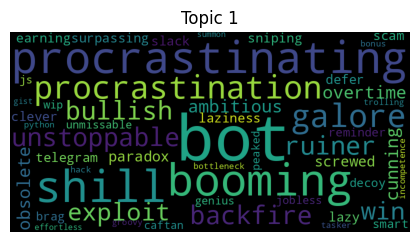

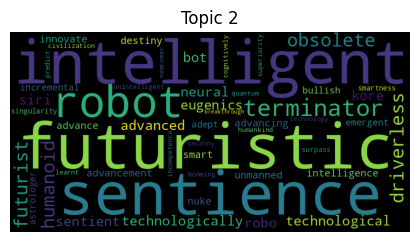

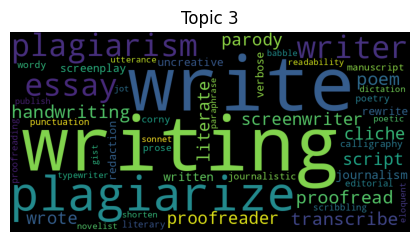

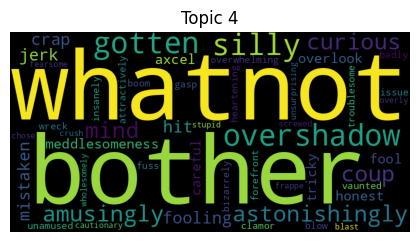

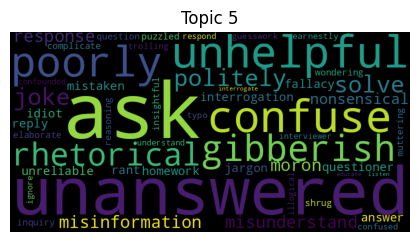

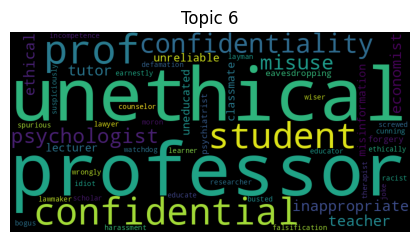

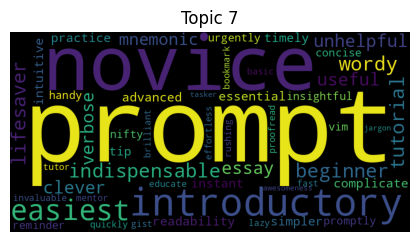

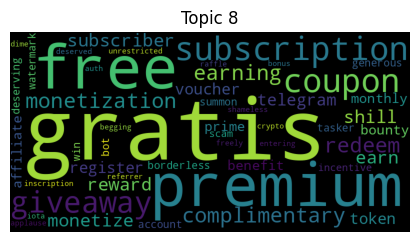

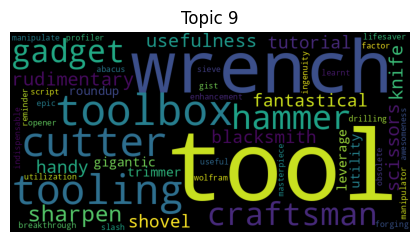

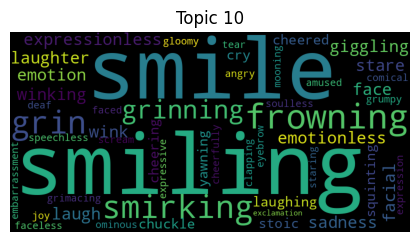

In [ ]:
#Reducing the 131 topics to 10 topics

reduced_topics = model.hierarchical_topic_reduction(num_topics=10)
Topic_Words_Update =model.topic_words_reduced

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generating word clouds for each topic
for i, topic_words in enumerate(Topic_Words_Update):
    wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='black', 
                min_font_size = 10).generate_from_text(' '.join(topic_words))
    # Ploting the word cloud for the topic
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(f"Topic {i+1}")
    plt.show()

In [ ]:
#Labeling the topics from 1 to 10

topic_labels = list(enumerate([
    "Topic1", "Topic2", "Topic3", "Topic4",
    "Topic5", "Topic6", "Topic7", "Topic8",
    "Topic9", "Topic10"]))

df_top = pd.DataFrame(topic_labels, columns=["topic_id", "topic_name"])

hierarchy=model.get_topic_hierarchy()

hierarchy_labels = list(enumerate(hierarchy))

hierarchy_labels_df = pd.DataFrame(hierarchy_labels, columns=["topic_id", "underlying_topics"])

df_topics = df_top.merge(hierarchy_labels_df, on="topic_id", how="left")


# Enumerating the segments to allow joining with the topics data frame
segment_topic_ids = [
    model.get_documents_topics(doc_ids=[i,])[0][0]
    for i,_ in enumerate(df['translated_text'])]
  

df['Topic_ID'] = segment_topic_ids
emp=[]

for i in range(len(df['Topic_ID'])):
  for j in range(10):
    if df['Topic_ID'][i] in df_topics['underlying_topics'][j]:
      emp.append(df_topics['topic_name'][j])


# Obtaining the labeled 
df['Topic_No']=emp
df = df.drop('Topic_ID', axis=1)
df.head()

tweet_id              tweet_created  \
0  1.642890e+18  2023-04-03 13:59:44+00:00   
1  1.642844e+18  2023-04-03 10:59:22+00:00   
2  1.642739e+18  2023-04-03 03:59:28+00:00   
3  1.642920e+18  2023-04-03 15:59:59+00:00   
4  1.642708e+18  2023-04-03 01:59:25+00:00   

                                                text lang  \
0  RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...   th   
1  ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...   ja   
2  RT @DarrellLerner: ChatGPT Plugins are the fas...   en   
3  Get an intelligent chatbot for your website in...   en   
4  🔥Hey Guys, #ZenithSwap has launched at just $ ...   en   

                                     translated_text  \
0  RT @jexep: Techniques for practicing language ...   
1  4 Chrome extensions that can make more use of ...   
2  RT @DarrellLerner: ChatGPT Plugins are the fas...   
3  Get an intelligent chatbot for your website in...   
4  🔥Hey Guys, #ZenithSwap has launched at just $ ...   

                                      cleaned_tweets Topic_No  
0  technique language tried tried german use meth...   Topic1  
1                        4 chrome extension make use   Topic1  
2  way get rich 2023 ’ step step guide showing ea...   Topic1  
3  get intelligent minute  trn data let answer qu...   Topic8  
4  fire hey guy 55 000  powered yield farming 4x ...   Topic1

# Sentiment Analysis

*   BLOB

Polarity is a measure that ranges from -1 to 1. A polarity score of -1 denotes a highly negative sentiment, whereas a score of 1 indicates a highly positive sentiment.

On the other hand, subjectivity assesses the extent to which the text includes personal opinions versus factual information. If a piece of text has high subjectivity, it suggests that it contains more of personal viewpoints or biases. Conversely, a low subjectivity score implies that the text is more grounded in factual information.

In [ ]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Tokenize and calculate sentiments per tweet
def get_sentiment(text):
    if isinstance(text, float):
        text = str(text)
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

df['sentiment'], df['subjectivity'] = zip(*df['cleaned_tweets'].apply(get_sentiment))

In [ ]:
#Labeling the polarity scores 
def sentiment_to_label(sentiment):
    if sentiment > 0.05:
        return 'Positive'
    elif sentiment < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
#Labeling the polarity scores
def subjectivity_to_label(subjectivity):
    if subjectivity > 0.5:
        return 'Subjective'
    else:
        return 'Objective'

In [ ]:
#Applying the previous functions into the df 
df['sentiment_label'] = df['sentiment'].apply(sentiment_to_label)
df['subjectivity_label'] = df['subjectivity'].apply(subjectivity_to_label)

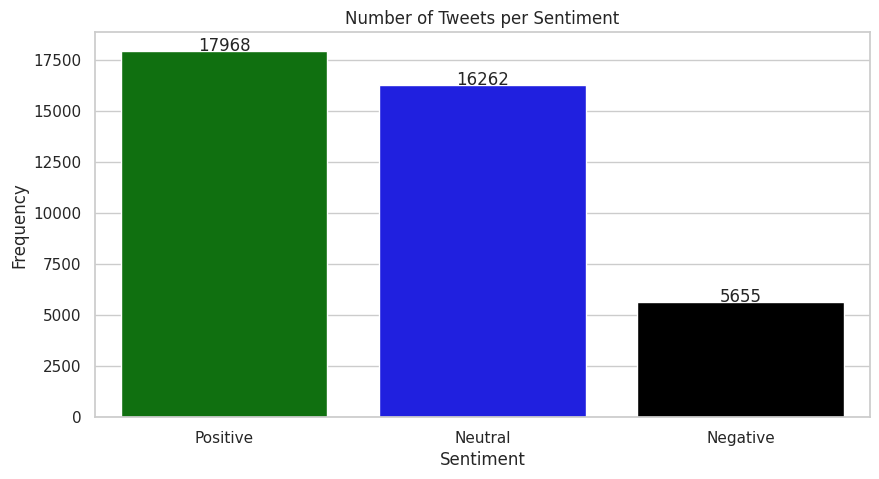

In [ ]:
order = ['Positive', 'Neutral', 'Negative']
colors = ['green', 'blue', 'black']

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")


ax = sns.countplot(x="sentiment_label", data=df, order=order, palette=colors)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2), 
            y=height+0.1, 
            s='{:.0f}'.format(height), 
            ha='center') 

plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Number of Tweets per Sentiment')
plt.show()

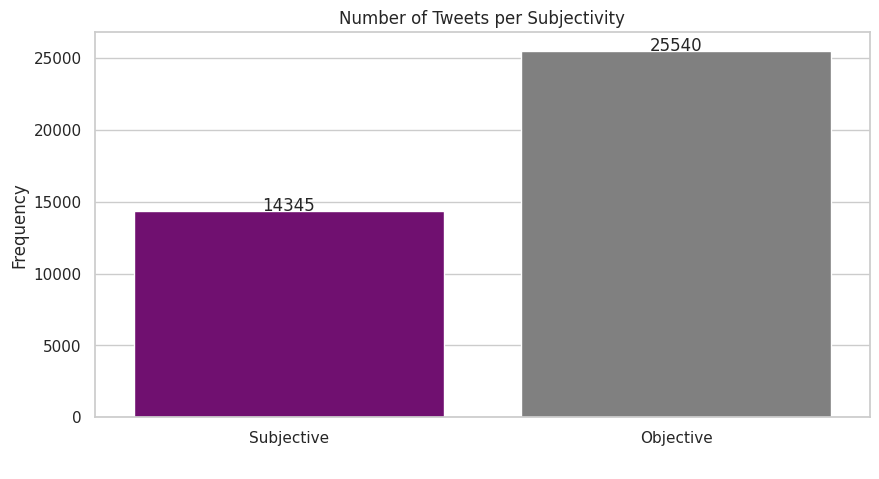

In [ ]:
order = ['Subjective', 'Objective']
colors = ['purple', 'gray']

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")


ax = sns.countplot(x="subjectivity_label", data=df, order=order, palette=colors)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2), 
            y=height+0.1, 
            s='{:.0f}'.format(height), 
            ha='center') 

plt.xlabel(' ')
plt.ylabel('Frequency')
plt.title('Number of Tweets per Subjectivity')
plt.show()

## Word Cloud

The word cloud is created using the WordCloud package. The frequencies of aspects and sentiments are calculated using both the spaCy package and the Counter class from the collections module. The spaCy package is utilized to detect adjectives and nouns in our tweets database, while the Counter class helps us count the occurrences of these aspects and sentiments. The frequency of appearance of each aspect and sentiment is then used to determine the size and prominence of the words in the word cloud visualization. By visually representing the most frequently occurring adjectives and nouns, we gain insights into the prevalent aspects and sentiments expressed in our tweets data.

In [ ]:
import spacy
from wordcloud import WordCloud
from collections import Counter
from multiprocessing import Pool
from sklearn.cluster import KMeans

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Making the column string type
df['cleaned_tweets'] = df['cleaned_tweets'].astype(str)

In [ ]:
# Extracting nouns and adjectives and saving as an aspects and sentiments 
def find_pairs(sentence):
    pairs = []
    doc = nlp(sentence)
    
    for token in doc:
        if token.pos_ == 'NOUN':
            for child in token.children:
                if child.pos_ == 'ADJ':
                    adj = ''
                    for g_child in child.children:
                        if g_child.pos_ == 'ADV':
                            adj += g_child.text + ' '
                    adj += child.text
                    
                    pairs.append({'aspect': token.lemma_, 'sentiment': adj})
    return pairs

In [ ]:
with Pool() as pool:
    df['pairs'] = pool.map(find_pairs, df['cleaned_tweets'])

In [ ]:
#Printing per tweet the pair of aspects and sentiments detected 
for index, row in df.iterrows():
    print(f"Pairs for tweet {index}: {row['pairs']}")
    print()

    if index == 12:  # Stop after the indicated iteration
        break

aspects = [pair['aspect'] for pairs in df['pairs'] for pair in pairs]
sentiments = [pair['sentiment'] for pairs in df['pairs'] for pair in pairs]

frequency_dict_aspects = Counter(aspects)
frequency_dict_sentiments = Counter(sentiments)

top_10_sentiments = frequency_dict_sentiments.most_common(10)
top_10_sentiments, top_10_frequencies = zip(*top_10_sentiments)

Pairs for tweet 0: [{'aspect': 'method', 'sentiment': 'german'}]

Pairs for tweet 1: []

Pairs for tweet 2: [{'aspect': 'guide', 'sentiment': 'rich'}]

Pairs for tweet 3: [{'aspect': 'trn', 'sentiment': 'intelligent'}]

Pairs for tweet 4: [{'aspect': 'fire', 'sentiment': 'potential'}, {'aspect': 'fire', 'sentiment': 'low'}]

Pairs for tweet 5: []

Pairs for tweet 6: [{'aspect': 'people', 'sentiment': 'modern'}]

Pairs for tweet 7: []

Pairs for tweet 8: []

Pairs for tweet 9: [{'aspect': 'integrity', 'sentiment': 'academic'}, {'aspect': 'launch', 'sentiment': 'speedy'}, {'aspect': 'piece', 'sentiment': 'important'}]

Pairs for tweet 10: []

Pairs for tweet 11: [{'aspect': 'joy', 'sentiment': 'tear'}]

Pairs for tweet 12: [{'aspect': 'review', 'sentiment': 'systematic'}]



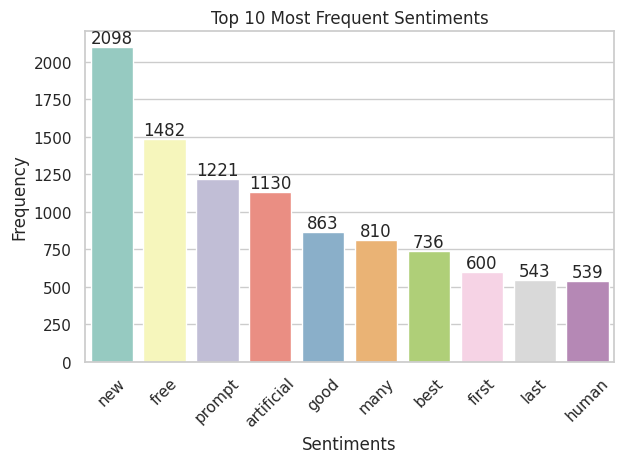

In [ ]:
plot_df = pd.DataFrame({'Sentiments': top_10_sentiments, 'Frequency': top_10_frequencies})

num_bins = len(top_10_sentiments)
colors = sns.color_palette('Set3', num_bins)

sns.barplot(data=plot_df, x='Sentiments', y='Frequency', palette=colors)

for index, row in plot_df.iterrows():
    plt.text(index, row['Frequency'], str(row['Frequency']), ha='center', va='bottom')

plt.xlabel('Sentiments')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Sentiments')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

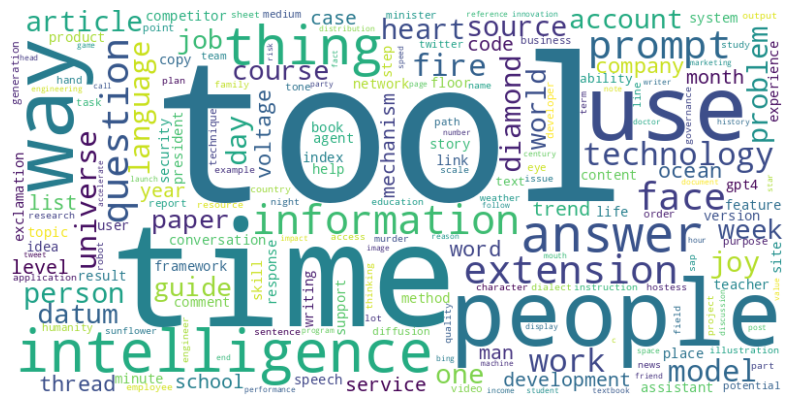

In [ ]:
# Create a word cloud based on the frequency dictionary of aspects 
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200).generate_from_frequencies(frequency_dict_aspects)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

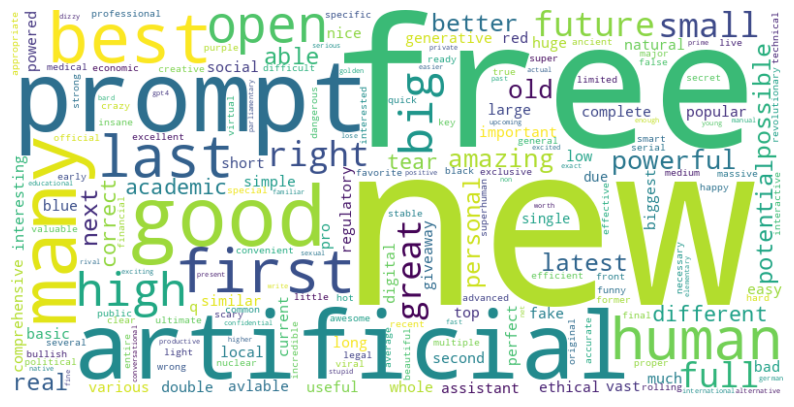

In [ ]:
# Create a word cloud based on the frequency dictionary of sentiments
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200).generate_from_frequencies(frequency_dict_sentiments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Word2Vec

Word2Vec is a technique that uses numerical vectors to represent words based on their context in text. It captures the semantic meaning and helps analyze sentiment in tweets about ChatGPT.

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster


In [ ]:
# Multiprocessing
with Pool() as p:
    tokenized_tweets = p.map(str.split, df['cleaned_tweets'])

In [ ]:
# Tokenize the words with Word2Vec per tweet 
model = Word2Vec(sentences=tokenized_tweets, vector_size=100, window=5, min_count=1, workers=4, max_final_vocab=10000)

In [ ]:
word_vectors = model.wv[model.wv.key_to_index]
words = list(model.wv.key_to_index.keys())

In [ ]:
pca = PCA(n_components=10) #Ten components reduction 
word_vectors_pca = pca.fit_transform(word_vectors)

tsne = TSNE(n_components=2, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors_pca)

# Adding polarity measures to the vectors/words 
sentiment_scores = [TextBlob(word).sentiment.polarity for word in words]

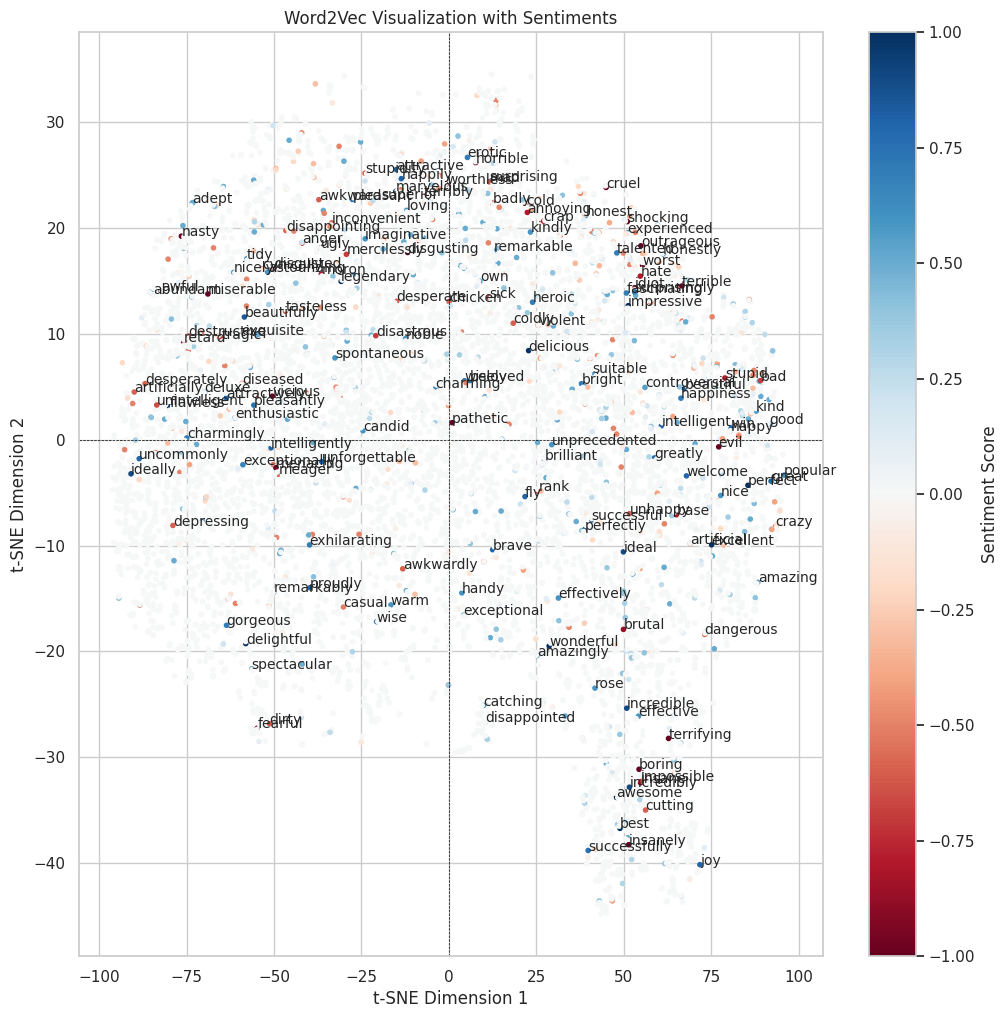

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], c=sentiment_scores, cmap='RdBu', marker='.')


plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)


for i, word in enumerate(words):
    if abs(sentiment_scores[i]) > 0.5:  # We only annotate words with high sentiment scores
        plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), size=10)  

plt.colorbar(label='Sentiment Score')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word2Vec Visualization with Sentiments')
plt.show()


In [ ]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(word_vectors_tsne)

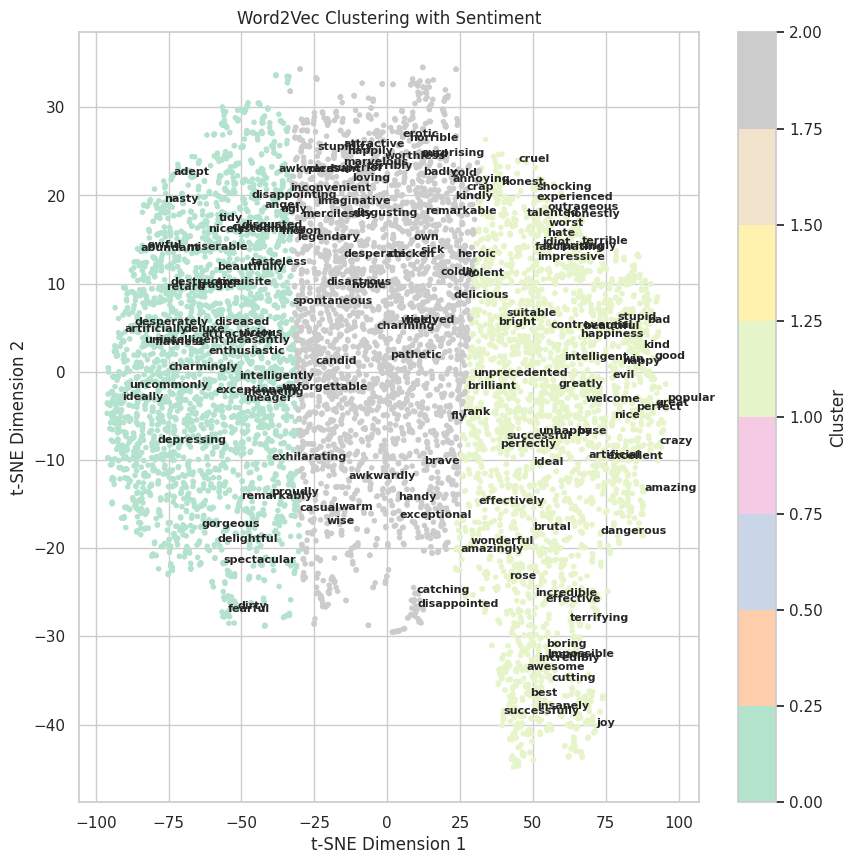

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], c=cluster_labels, cmap='Pastel2', marker='.')

for i, word in enumerate(words):
    if abs(sentiment_scores[i]) > 0.5:  # We only annotate words with high sentiment scores
        plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), size=8, weight='bold')

plt.colorbar(label='Cluster')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word2Vec Clustering with Sentiment')
plt.show()

In [ ]:
Z = linkage(word_vectors_tsne, 'ward')

cluster_labels_2 = fcluster(Z, 3, criterion='maxclust')

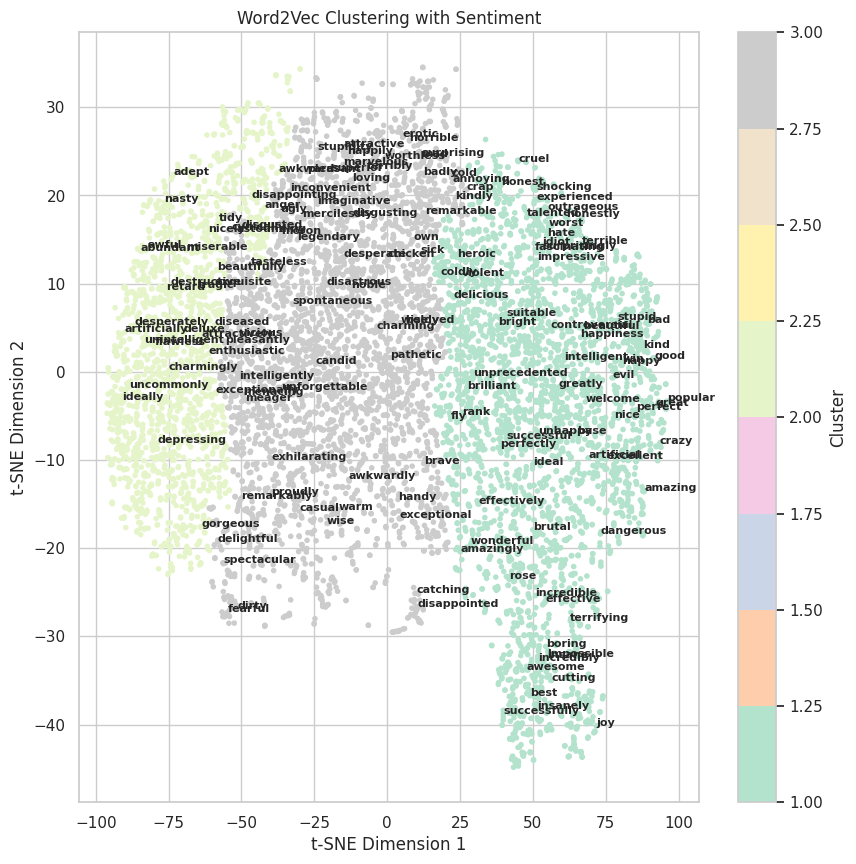

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], c=cluster_labels_2, cmap='Pastel2', marker='.')

for i, word in enumerate(words):
    if abs(sentiment_scores[i]) > 0.5:  # We only annotate words with high sentiment scores
        plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), size=8, weight='bold')

plt.colorbar(label='Cluster')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word2Vec Clustering with Sentiment')
plt.show()

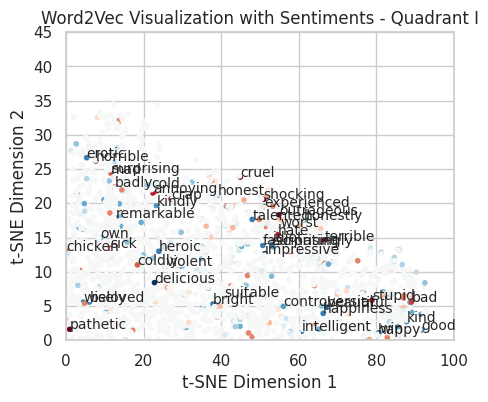

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], c=sentiment_scores, cmap='RdBu', marker='.')

for i, word in enumerate(words):
    if abs(sentiment_scores[i]) > 0.5:  # We only annotate words with high sentiment scores
        plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), size=10)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word2Vec Visualization with Sentiments - Quadrant I')

plt.xlim(0, 100)  
plt.ylim(0, 45)  

plt.show()

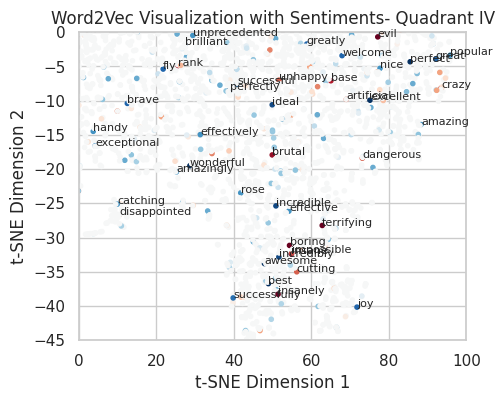

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], c=sentiment_scores, cmap='RdBu', marker='.')

for i, word in enumerate(words):
    if abs(sentiment_scores[i]) > 0.5:  # We only annotate words with high sentiment scores
        plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), size=8)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word2Vec Visualization with Sentiments- Quadrant IV')

plt.xlim(0, 100)  
plt.ylim(-45, 0)  

plt.show()

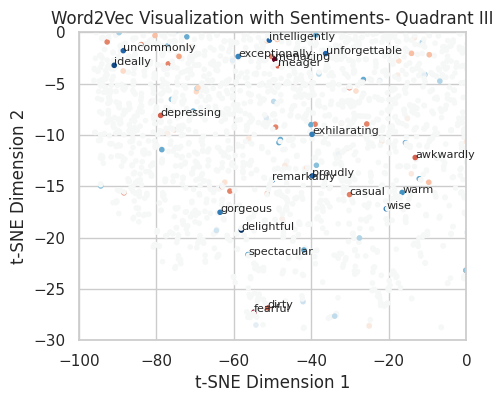

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], c=sentiment_scores, cmap='RdBu', marker='.')

for i, word in enumerate(words):
    if abs(sentiment_scores[i]) > 0.5:  # We only annotate words with high sentiment scores
        plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), size=8)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word2Vec Visualization with Sentiments- Quadrant III')

plt.xlim(-100, 0)  
plt.ylim(-30, 0)  

plt.show()

## Sentiments through time

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import drange
import seaborn as sns
from datetime import datetime
import datetime

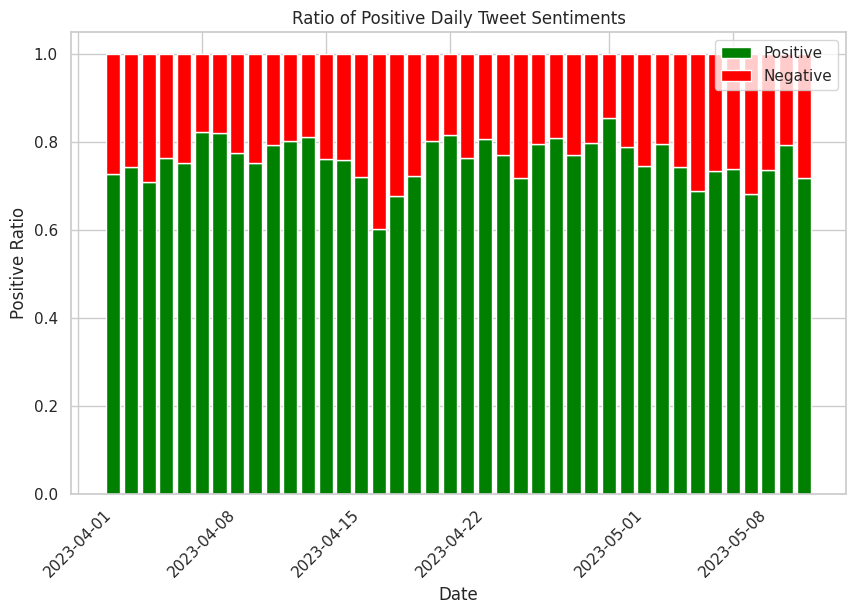

In [ ]:
tweet_dates = []
for i in range(len(df)):
    tweet_dates.append(datetime.datetime.strptime(df.iloc[i, 1][2:-6], '%y-%m-%d %H:%M:%S').date())
df['Date'] = tweet_dates

unique_dates = list(set(df['Date']))
positive_counts = []
negative_counts = []

for date in unique_dates:
    daily_df = df.loc[df['Date'] == date]
    pos_tweets = len(daily_df[daily_df['sentiment_label'] == "Positive"])
    neg_tweets = len(daily_df[daily_df['sentiment_label'] == "Negative"])
    positive_counts.append(pos_tweets)
    negative_counts.append(neg_tweets)

total_counts = np.array(positive_counts) + np.array(negative_counts)
positive_proportions = np.array(positive_counts) / total_counts
negative_proportions = np.array(negative_counts) / total_counts

plt.figure(figsize=(10, 6))
plt.bar(unique_dates, positive_proportions, color='green', label='Positive')
plt.bar(unique_dates, negative_proportions, bottom=positive_proportions, color='red', label='Negative')



plt.xlabel('Date')
plt.ylabel('Positive Ratio')
plt.title('Ratio of Positive Daily Tweet Sentiments')
plt.xticks(rotation=45)
plt.legend()
plt.show()

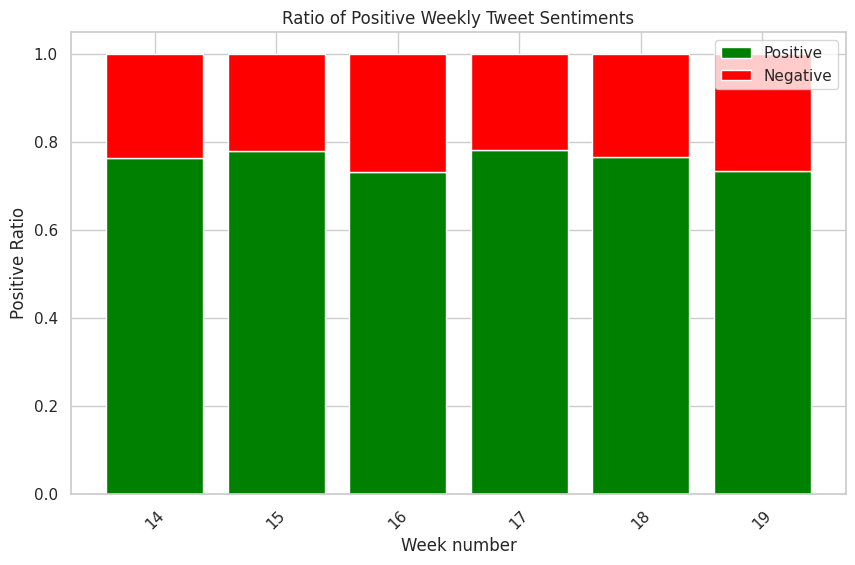

In [ ]:
week_numbers = []
for i in tweet_dates:
  week_numbers.append(i.isocalendar()[1])
df['Week'] = week_numbers

unique_weeks = list(set(week_numbers))
weekly_sentiment = []
positive_weekly_counts = []
negative_weekly_counts = []
for i in range(len(unique_weeks)):
    weekly_df = df.loc[df['Week'] == list(set(df['Week']))[i]]
    pos_tweets = len(weekly_df[weekly_df['sentiment_label'] == "Positive"])
    neg_tweets = len(weekly_df[weekly_df['sentiment_label'] == "Negative"])
    positive_weekly_counts.append(pos_tweets)
    negative_weekly_counts.append(neg_tweets)


total_weekly_counts = np.array(positive_weekly_counts) + np.array(negative_weekly_counts)
positive_weekly_proportions = np.array(positive_weekly_counts) / total_weekly_counts
negative_weekly_proportions = np.array(negative_weekly_counts) / total_weekly_counts

plt.figure(figsize=(10, 6))
plt.bar(unique_weeks, positive_weekly_proportions, color='green', label='Positive')
plt.bar(unique_weeks, negative_weekly_proportions, bottom=positive_weekly_proportions, color='red', label='Negative')


plt.xlabel('Week number')
plt.ylabel('Positive Ratio')
plt.title('Ratio of Positive Weekly Tweet Sentiments')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Sentiment analysis of topics

In [ ]:
unique_topics = list(set(df['Topic_No']))
topic_sentiment = []
for i in range(len(unique_topics)):
    topic_df = df.loc[df['Topic_No'] == list(set(df['Topic_No']))[i]]
    pos_tweets = len(topic_df[topic_df['sentiment_label'] == "Positive"])
    neg_tweets = len(topic_df[topic_df['sentiment_label'] == "Negative"])
    topic_sentiment.append(pos_tweets / (pos_tweets + neg_tweets))

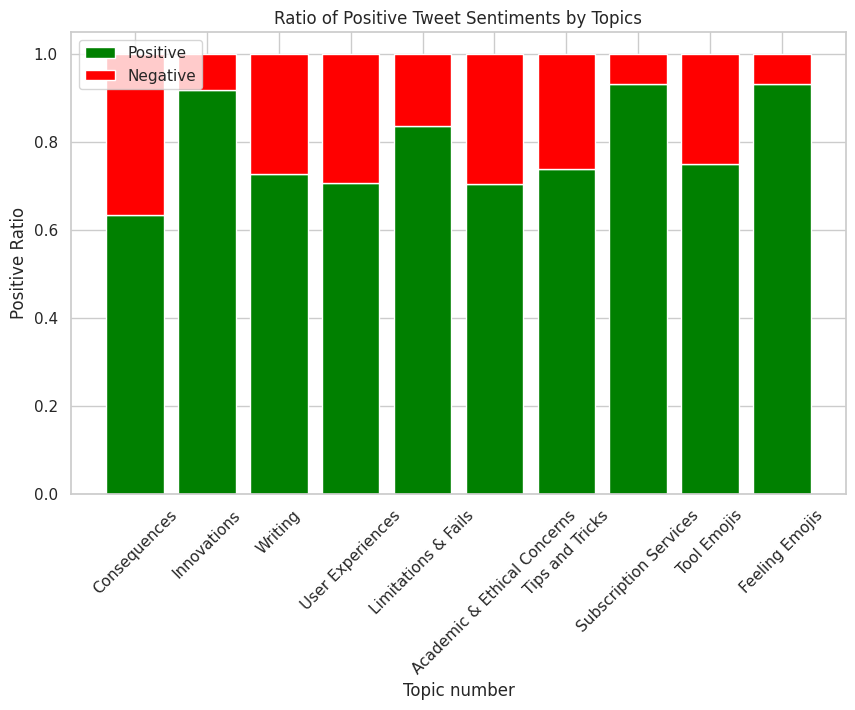

In [ ]:
unique_topics = ["Topic1", "Topic2", "Topic3", "Topic4", "Topic5", "Topic6", "Topic7", "Topic8", "Topic9", "Topic10"]
unique_topics_names = ["Consequences", "Innovations", "Writing", "User Experiences", "Limitations & Fails", "Academic & Ethical Concerns", "Tips and Tricks", "Subscription Services", "Tool Emojis", "Feeling Emojis"]
topic_sentiment = []
positive_topic_counts = []
negative_topic_counts = []
for i in range(len(unique_topics)):
    topic_df = df.loc[df['Topic_No'] == list(set(df['Topic_No']))[i]]
    pos_tweets = len(topic_df[topic_df['sentiment_label'] == "Positive"])
    neg_tweets = len(topic_df[topic_df['sentiment_label'] == "Negative"])
    positive_topic_counts.append(pos_tweets)
    negative_topic_counts.append(neg_tweets)

total_topic_counts = np.array(positive_topic_counts) + np.array(negative_topic_counts)
positive_topic_proportions = np.array(positive_topic_counts) / total_topic_counts
negative_topic_proportions = np.array(negative_topic_counts) / total_topic_counts

plt.figure(figsize=(10, 6))
plt.bar(unique_topics_names, positive_topic_proportions, color='green', label='Positive')
plt.bar(unique_topics_names, negative_topic_proportions, bottom=positive_topic_proportions, color='red', label='Negative')


plt.xlabel('Topic number')
plt.ylabel('Positive Ratio')
plt.title('Ratio of Positive Tweet Sentiments by Topics')
plt.xticks(rotation=45)
plt.legend()
plt.show()